In [36]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [24]:
import cv2
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

import shutil
import os, sys, glob

GradeCode = {
    '3+3': 0,
    '4+4': 1,
    '4+5': 2,
    'BN':  3,
    'ST':  4
}

# prob_list = sorted(glob.glob('/Users/nathaning/Dropbox/projects/semantic_pca/figures/probs/*probability.jpg'))
prob_list = sorted(glob.glob('/Users/nathaning/Dropbox/projects/semantic_pca/wsi_results/segnet_basic_rawprob/*RGB.png'))
anno_list = sorted(glob.glob('/Users/nathaning/Dropbox/projects/semantic_pca/data/annotations/wsi_annotation/*.png'))

# prob_base = [os.path.basename(os.path.splitext(pb)[0]).replace('_probability', '') for pb in prob_list]
prob_base = [os.path.basename(os.path.splitext(pb)[0]).replace('_argmaxRGB', '') for pb in prob_list]
anno_base = [os.path.basename(os.path.splitext(ab)[0]) for ab in anno_list]

prob_list = [p_path for pb, p_path in zip(prob_base, prob_list) if pb in anno_base]
# prob_base = [os.path.basename(os.path.splitext(pb)[0]).replace('_probability', '') for pb in prob_list]
prob_base = [os.path.basename(os.path.splitext(pb)[0]).replace('_argmaxRGB', '') for pb in prob_list]
anno_list = [a_path for ab, a_path in zip(anno_base, anno_list) if ab in prob_base]

print len(prob_list), len(anno_list)

29 29


(1640, 2988) 0 3
(1640, 2988) 0 255 [  0   3 255]
[3]


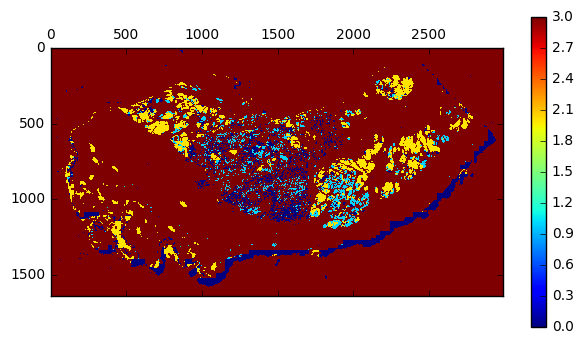

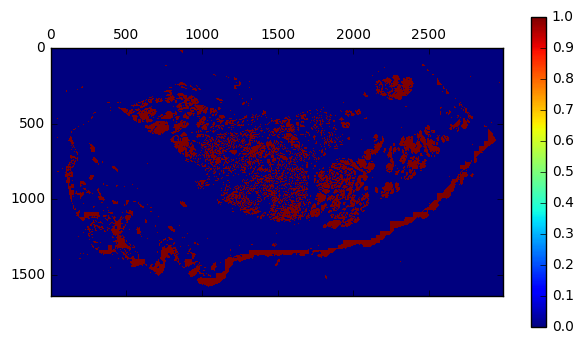

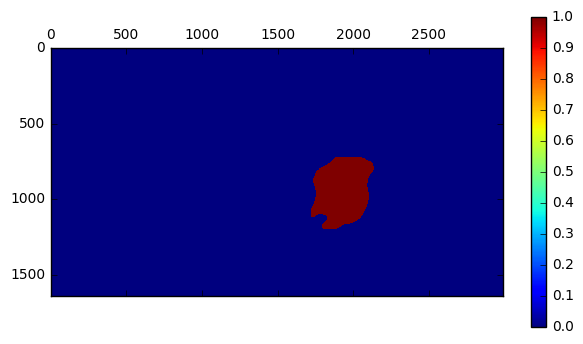

In [35]:

ppath = prob_list[0]
apath = anno_list[0]

pimg = cv2.imread(ppath, -1)
aimg = cv2.imread(apath, -1)

print pimg.shape, pimg.min(), pimg.max()
print aimg.shape, aimg.min(), aimg.max(), np.unique(aimg)

# pmax = np.argmax(pimg, axis=2)
plt.matshow(pimg); plt.colorbar()
epithelium = (pimg==0) | (pimg==1) | (pimg==2)
plt.matshow(epithelium); plt.colorbar()

annotations, _ = cv2.findContours((aimg<255).astype(np.uint8),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

anno = annotations[1]
mask = np.zeros_like(aimg)
cv2.drawContours(mask, [anno], 0, (1), -1)
mask = mask==1
grade = np.unique(aimg[mask])[0]
print grade
plt.matshow(mask); plt.colorbar()

In [17]:
len(annotations)

2